# Генерация изображения по полученным данным

In [69]:
import numpy as np
import seaborn as sb

arr = []
with open('test_heatmaps.mp4_result(convex_hull).txt', mode='r') as file:
    width, height = map(int, file.readline().split())
    print(f'width = {width}, height = {height}')
    for y in range(height):
        arr.append([int(value) for value in file.readline().split()])
        
matrix = np.array(arr, dtype=np.float64)
length_in_sec = 2603
matrix = matrix / length_in_sec

width = 1920, height = 1080


In [70]:
# Проверка
print(matrix.shape)
print(matrix.dtype)

(1080, 1920)
float64


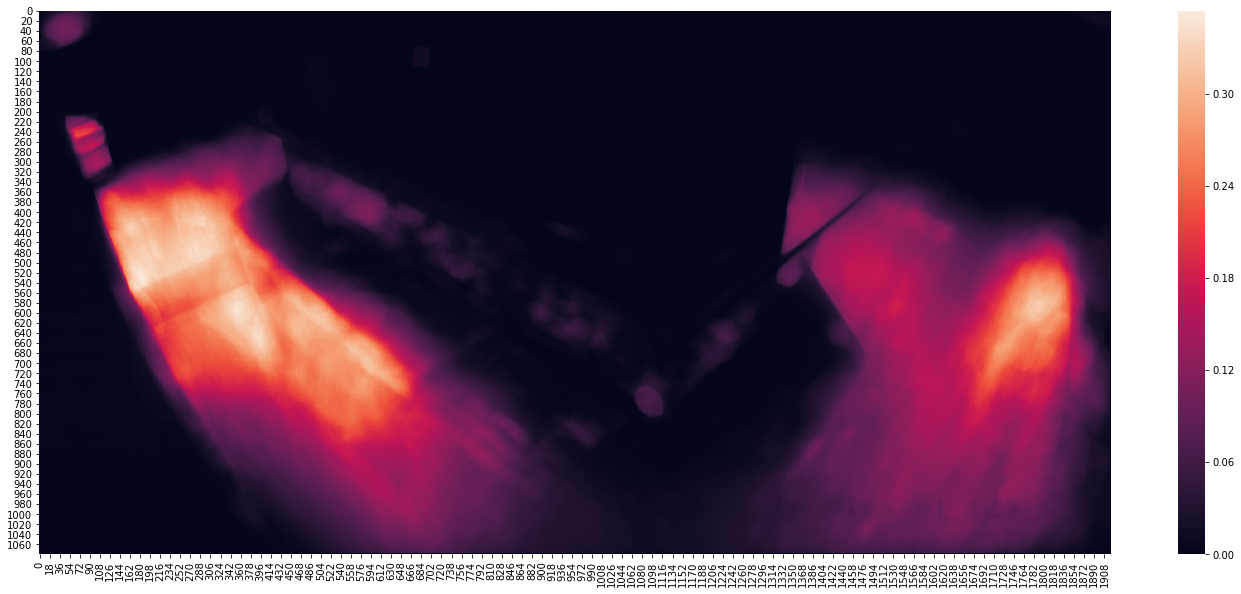

In [76]:
import matplotlib.pyplot as plt

plt.figure(figsize=(24, 10))  
ax = sb.heatmap(matrix)

In [77]:
matrix[40:120, 700:830] = 0

In [78]:
fig = ax.get_figure()
fig.savefig("heatmap.png")

# Цветная картинка, наложенная на кадр из видео

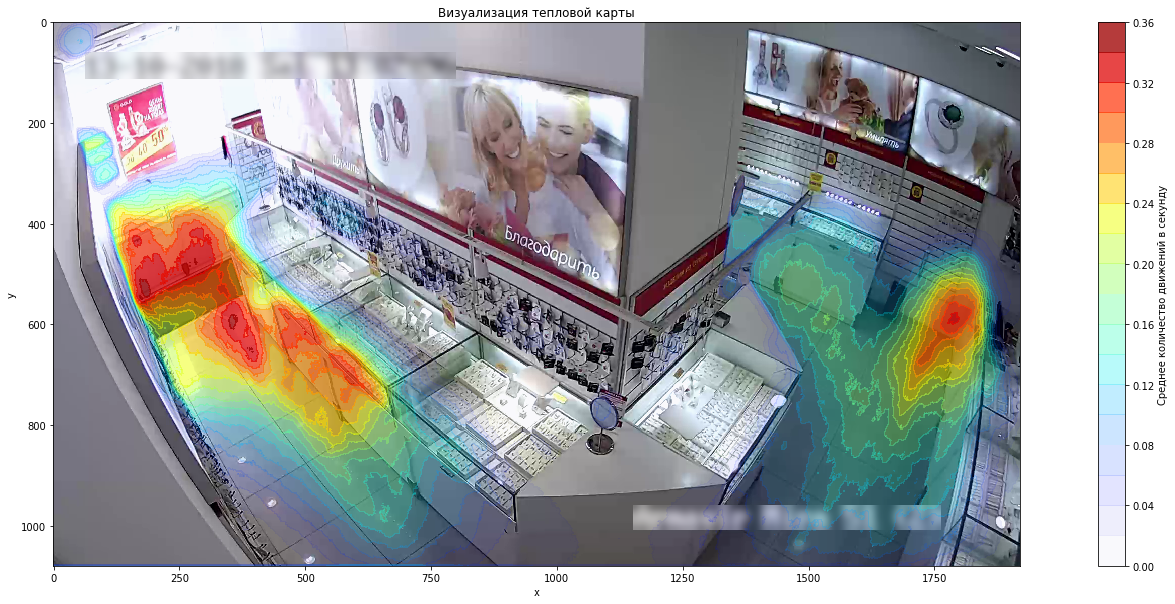

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from PIL import Image


def transparent_cmap(cmap, N=255):
    "Copy colormap and set alpha values"
    mycmap = cmap
    mycmap._init()
    mycmap._lut[:,-1] = np.linspace(0, 0.8, N+4)
    return mycmap


mycmap = transparent_cmap(plt.cm.jet)
img = Image.open('./image_frame.png')
p = np.asarray(img).astype('float')
w, h = img.size
y, x = np.mgrid[0:h, 0:w]

# Plot image and overlay colormap
fig, ax = plt.subplots(1, 1, figsize=(28, 10))
ax.imshow(img)

n_colours = 17
color_bar = ax.contourf(x, y, matrix.reshape(x.shape[0], y.shape[1]), n_colours, cmap=mycmap)
color_bar = plt.colorbar(color_bar)
plt.ylabel('y')
plt.xlabel('x')
color_bar.ax.set_ylabel('Среднее количество движений в секунду')
plt.title('Визуализация тепловой карты')
plt.show()

In [80]:
fig.savefig('heatmap_1.png')